In [1]:

extract_path = "/home/DSE423/Documents/FL Project/Data"


In [2]:
import os

# Path to your extracted data
base_dir = "/home/DSE423/Documents/FL Project/Data"

# Define valid image extensions (to ignore stray files)
valid_exts = ('.jpg', '.jpeg', '.png', '.nii', '.gz')

# Count images in each subfolder
for folder in sorted(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        count = sum(
            1 for file in os.listdir(folder_path)
            if file.lower().endswith(valid_exts)
        )
        print(f"{folder}: {count} images")


Mild Dementia: 5002 images
Moderate Dementia: 488 images
Non Demented: 67222 images
Very mild Dementia: 13725 images


In [3]:
import os
import pandas as pd

# Path to your dataset
# Updated to your local Mac path
base_dir = "/home/DSE423/Documents/FL Project/Data"

# Supported image extensions
valid_exts = ('.jpg', '.jpeg', '.png', '.tif', '.tiff')

data_records = []

# Walk through folders
print(f"Searching for images in: {base_dir}")
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(valid_exts):
            label = os.path.basename(root)  # Folder name = label
            file_path = os.path.join(root, file)
            data_records.append((file_path, label))

print(f"Found {len(data_records)} images.")

# Create a DataFrame
df = pd.DataFrame(data_records, columns=["image_path", "label"])

# After creating df (DataFrame of all images)
df_small = (
    df.groupby("label", group_keys=False)
      .apply(lambda x: x.sample(frac=0.1, random_state=42))  # take 10% from each class
      .reset_index(drop=True)
)




# Save CSV to local folder
# Updated to your local Mac path
manifest_path = "/home/DSE423/Documents/FL Project/manifest.csv"
df.to_csv(manifest_path, index=False)

print("✅ Manifest created successfully!")
print(f"📸 Total images found: {len(df)}")
print(f"💾 Saved to: {manifest_path}")
print("\nSample rows:")
print(df.head())

Searching for images in: /home/DSE423/Documents/FL Project/Data
Found 86437 images.
✅ Manifest created successfully!
📸 Total images found: 86437
💾 Saved to: /home/DSE423/Documents/FL Project/manifest.csv

Sample rows:
                                          image_path              label
0  /home/DSE423/Documents/FL Project/Data/Moderat...  Moderate Dementia
1  /home/DSE423/Documents/FL Project/Data/Moderat...  Moderate Dementia
2  /home/DSE423/Documents/FL Project/Data/Moderat...  Moderate Dementia
3  /home/DSE423/Documents/FL Project/Data/Moderat...  Moderate Dementia
4  /home/DSE423/Documents/FL Project/Data/Moderat...  Moderate Dementia


/tmp/ipykernel_215140/1477990416.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.1, random_state=42))  # take 10% from each class


✅ Total images: 86437

📊 Images per class:
label
Non Demented          67222
Very mild Dementia    13725
Mild Dementia          5002
Moderate Dementia       488
Name: count, dtype: int64


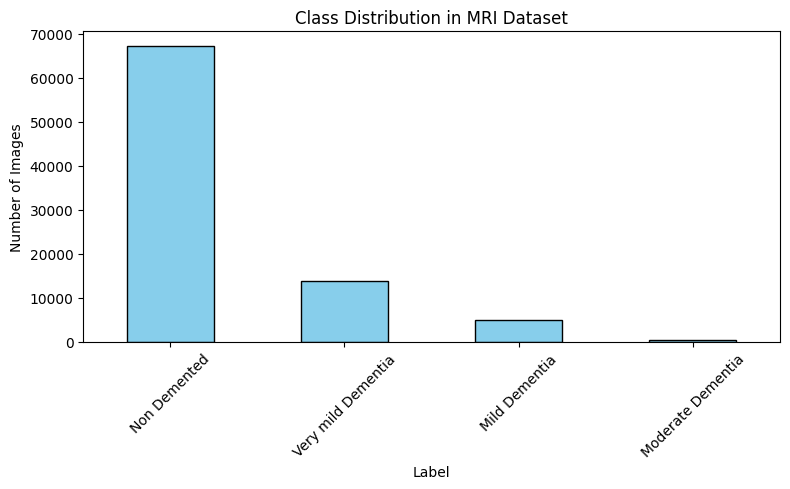

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the manifest
# Updated to your local Mac path
manifest_path = "/home/DSE423/Documents/FL Project/manifest.csv"

df = pd.read_csv(manifest_path)

# Check total images
print(f"✅ Total images: {len(df)}\n")

# Check number of images per class
print("📊 Images per class:")
print(df['label'].value_counts())

# Plot class distribution
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Class Distribution in MRI Dataset")
plt.xlabel("Label")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold  # <-- CHANGED: Import KFold
import os

# Path to your manifest file (using the 10% subset)
# Make sure this points to 'manifest_small.csv' to keep the workload light
manifest_path = "/home/DSE423/Documents/FL Project/manifest.csv"

# Read the manifest
df = pd.read_csv(manifest_path)

# Number of clients
num_clients = 10

# Output directory for client splits
output_dir = "/home/DSE423/Documents/FL Project/client_splits"
os.makedirs(output_dir, exist_ok=True)

# Create random folds using KFold
# <-- CHANGED: Replaced StratifiedKFold with KFold
kf = KFold(n_splits=num_clients, shuffle=True, random_state=42)

# <-- CHANGED: The loop no longer needs df['label']
for i, (_, test_idx) in enumerate(kf.split(df)):
    client_df = df.iloc[test_idx]
    client_path = os.path.join(output_dir, f"client_{i+1}.csv")
    client_df.to_csv(client_path, index=False)
    print(f"✅ Saved: {client_path} | Samples: {len(client_df)}")

print("\n🎉 Data successfully split into 10 RANDOM clients!")

✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_1.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_2.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_3.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_4.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_5.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_6.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_7.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_8.csv | Samples: 8643
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_9.csv | Samples: 8643
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_10.csv | Samples: 8643

🎉 Data successfully split into 20 RANDOM clients!


In [6]:
import pandas as pd
import os

# Updated to your local Mac path
split_dir = "/home/DSE423/Documents/FL Project/client_splits"

# Go through each client CSV and print class distribution
for file in sorted(os.listdir(split_dir)):
    if file.endswith(".csv"):
        client_df = pd.read_csv(os.path.join(split_dir, file))
        print(f"\n📁 {file}")
        print(client_df['label'].value_counts())


📁 client_1.csv
label
Non Demented          6747
Very mild Dementia    1365
Mild Dementia          487
Moderate Dementia       45
Name: count, dtype: int64

📁 client_10.csv
label
Non Demented          6686
Very mild Dementia    1422
Mild Dementia          482
Moderate Dementia       53
Name: count, dtype: int64

📁 client_2.csv
label
Non Demented          6756
Very mild Dementia    1315
Mild Dementia          516
Moderate Dementia       57
Name: count, dtype: int64

📁 client_3.csv
label
Non Demented          6706
Very mild Dementia    1377
Mild Dementia          520
Moderate Dementia       41
Name: count, dtype: int64

📁 client_4.csv
label
Non Demented          6766
Very mild Dementia    1324
Mild Dementia          504
Moderate Dementia       50
Name: count, dtype: int64

📁 client_5.csv
label
Non Demented          6781
Very mild Dementia    1348
Mild Dementia          460
Moderate Dementia       55
Name: count, dtype: int64

📁 client_6.csv
label
Non Demented          6715
Very mild Deme

In [7]:
# Step 1: Imports
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd

# Step 2: Define a common preprocessing transform
# (This will be identical for every client)
common_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),     # ensure grayscale
    transforms.Resize((224, 224)),                   # resize to 224x224
    transforms.ToTensor(),                           # convert to tensor [0,1]
    transforms.Normalize(mean=[0.5], std=[0.5])      # normalize to [-1,1]
])

print("✅ Libraries imported and transform ready for all clients.")


✅ Libraries imported and transform ready for all clients.


In [8]:
# Step 3: Define custom dataset for each client
class MRIDataset(Dataset):
    def __init__(self, csv_path, transform=None):
        self.data = pd.read_csv(csv_path)
        self.transform = transform

        # Create a label mapping so each class becomes a number
        self.label_map = {
            "Non Demented": 0,
            "Very mild Dementia": 1,
            "Mild Dementia": 2,
            "Moderate Dementia": 3
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 0]
        label_name = self.data.iloc[idx, 1]
        label = self.label_map[label_name]

        # Open image in grayscale mode
        image = Image.open(img_path).convert("L")

        # Apply transform (resize, normalize, etc.)
        if self.transform:
            image = self.transform(image)

        return image, label


In [9]:
# Step 4: Create DataLoaders for all clients

import glob

# Path where client CSVs are stored
# Updated to your local Mac path
client_csv_dir = "/home/DSE423/Documents/FL Project/client_splits"

# Load all CSVs
client_csvs = sorted(glob.glob(client_csv_dir + "/*.csv"))

client_loaders = {}
batch_size = 32  # you can adjust based on your GPU/CPU

for i, csv_path in enumerate(client_csvs, start=1):
    dataset = MRIDataset(csv_path, transform=common_transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    client_loaders[f"client_{i}"] = loader
    print(f"✅ Loaded client_{i} | Samples: {len(dataset)}")

print("\nAll client DataLoaders are ready and preprocessed consistently! 🚀")

✅ Loaded client_1 | Samples: 8644
✅ Loaded client_2 | Samples: 8643
✅ Loaded client_3 | Samples: 8644
✅ Loaded client_4 | Samples: 8644
✅ Loaded client_5 | Samples: 8644
✅ Loaded client_6 | Samples: 8644
✅ Loaded client_7 | Samples: 8644
✅ Loaded client_8 | Samples: 8644
✅ Loaded client_9 | Samples: 8643
✅ Loaded client_10 | Samples: 8643

All client DataLoaders are ready and preprocessed consistently! 🚀


In [11]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os

# Base directory where your client CSVs are stored
# FIXED: Added the leading '/' to make it an absolute path
base_dir = "/home/DSE423/Documents/FL Project/client_splits"

# Create new folder for split files
split_dir = os.path.join(base_dir, "splits")
os.makedirs(split_dir, exist_ok=True)

# Split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Loop over all 10 clients
for client_id in range(1, 11):
    client_path = os.path.join(base_dir, f"client_{client_id}.csv")
    df = pd.read_csv(client_path)

    # First split: Train vs temp (val+test)
    train_df, temp_df = train_test_split(
        df,
        test_size=(1 - train_ratio),
        stratify=df["label"],
        random_state=4_2
    )

    # Second split: Validation vs Test
    try:
        # Attempt stratified split
        val_df, test_df = train_test_split(
            temp_df,
            test_size=(test_ratio / (test_ratio + val_ratio)),
            stratify=temp_df["label"],
            random_state=42
        )
        print(f"✅ Client {client_id}: Stratified split successful.")
    except ValueError as e:
        # Fallback to non-stratified split if stratification fails
        print(f"⚠️ Client {client_id}: Stratified split failed due to small class size ({e}). Falling back to non-stratified split for val/test.")
        val_df, test_df = train_test_split(
            temp_df,
            test_size=(test_ratio / (test_ratio + val_ratio)),
            random_state=42
        )


    # Save all three splits
    train_path = os.path.join(split_dir, f"client_{client_id}_train.csv")
    val_path = os.path.join(split_dir, f"client_{client_id}_val.csv")
    test_path = os.path.join(split_dir, f"client_{client_id}_test.csv")

    train_df.to_csv(train_path, index=False)
    val_df.to_csv(val_path, index=False)
    test_df.to_csv(test_path, index=False)

    print(f"📊 Client {client_id} Split Sizes: Train={len(train_df)}, Val={len(val_df)}, Test={len(test_df)}")
    print(f"📁 Saved to: {split_dir}")


print("\n🎉 All clients successfully split into train/val/test sets!")

✅ Client 1: Stratified split successful.
📊 Client 1 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 2: Stratified split successful.
📊 Client 2 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 3: Stratified split successful.
📊 Client 3 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 4: Stratified split successful.
📊 Client 4 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 5: Stratified split successful.
📊 Client 5 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 6: Stratified split successful.
📊 Client 6 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 7: Stra

In [ ]:
import flwr

print(f"Flower (flwr) version: {flwr.__version__}")

Flower (flwr) version: 1.22.0


In [1]:
# ===== Imports =====
import os
import flwr as fl
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm
import pandas as pd
from PIL import Image
from typing import List, Tuple, Dict

from flwr.server.client_manager import SimpleClientManager
from flwr.server.server import Server
from flwr.common import parameters_to_ndarrays

# ===== Device setup (GPU or CPU) =====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🧠 Using device: {device}")

# ===== CNN Model =====
class MRI_CNN(nn.Module):
    def __init__(self, num_classes=4):
        super(MRI_CNN, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.MaxPool2d(2),
        )
        self.block4 = nn.Sequential(
            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(0.4),
        )
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

# ===== Dataset Class =====
class MRIDataset(torch.utils.data.Dataset):
    def __init__(self, csv_path, transform=None):
        self.data = pd.read_csv(csv_path)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 0]
        label = self.data.iloc[idx, 1]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label_map = {
            "Non Demented": 0,
            "Very mild Dementia": 1,
            "Mild Dementia": 2,
            "Moderate Dementia": 3,
        }
        return image, label_map[label]

# ===== Transform =====
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3),
])

# ===== Federated Client =====
class MRIClient(fl.client.NumPyClient):
    def __init__(self, train_loader, val_loader, model):
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.model = model.to(device)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr=0.001, momentum=0.9)

    def get_parameters(self, config=None):
        return [val.cpu().numpy() for _, val in self.model.state_dict().items()]

    def set_parameters(self, parameters):
        keys = list(self.model.state_dict().keys())
        new_state_dict = {k: torch.tensor(v, device=device) for k, v in zip(keys, parameters)}
        self.model.load_state_dict(new_state_dict, strict=True)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        self.model.train()
        for epoch in range(3):  # Local epochs = 3
            for imgs, labels in tqdm(self.train_loader, leave=False):
                imgs, labels = imgs.to(device), labels.to(device)
                self.optimizer.zero_grad()
                outputs = self.model(imgs)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
        return self.get_parameters(), len(self.train_loader.dataset), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        self.model.eval()
        loss, correct = 0.0, 0
        with torch.no_grad():
            for imgs, labels in self.val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = self.model(imgs)
                loss += self.criterion(outputs, labels).item()
                correct += (outputs.argmax(1) == labels).sum().item()
        accuracy = correct / len(self.val_loader.dataset)
        return float(loss), len(self.val_loader.dataset), {"accuracy": float(accuracy)}

# ===== Create client_fn =====
def client_fn(cid: str):
    client_id = int(cid) + 1
    base_path = "/home/DSE423/Documents/FL Project/client_splits/splits"
    train_csv = f"{base_path}/client_{client_id}_train.csv"
    val_csv = f"{base_path}/client_{client_id}_val.csv"

    train_dataset = MRIDataset(train_csv, transform)
    val_dataset = MRIDataset(val_csv, transform)

    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    model = MRI_CNN()
    return MRIClient(train_loader, val_loader, model)

# ===== Weighted metrics =====
def weighted_average(metrics: List[Tuple[int, Dict[str, float]]]) -> Dict[str, float]:
    total_examples = sum([num_examples for num_examples, _ in metrics])
    weighted_acc = sum([num_examples * m["accuracy"] for num_examples, m in metrics])
    return {"accuracy": weighted_acc / total_examples}

# ===== Federated Strategy =====
strategy = fl.server.strategy.FedAvg(
    fraction_fit=1.0,
    fraction_evaluate=1.0,
    min_fit_clients=10,
    min_evaluate_clients=10,
    min_available_clients=10,
    evaluate_metrics_aggregation_fn=weighted_average,
)

# ===== Server Setup =====
client_manager = SimpleClientManager()
server = Server(client_manager=client_manager, strategy=strategy)
print("✅ Server initialized for 10 clients and 3 local epochs.")

# ===== Run Simulation =====
print("🚀 Starting Federated Learning simulation...")

import ray
ray.shutdown()

num_gpus = torch.cuda.device_count()
client_resources = {"num_cpus": 2, "num_gpus": 1 if num_gpus > 0 else 0}

MANUAL_ROUNDS = 50

history = fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=10,
    config=fl.server.ServerConfig(num_rounds=MANUAL_ROUNDS),
    client_resources=client_resources,
    server=server,
    client_manager=client_manager,
)

print(f"🏁 Simulation finished after {MANUAL_ROUNDS} rounds!")

# ===== Save Final Global Model =====
print("\n💾 Saving the final global model...")

final_parameters = server.parameters
final_parameters_ndarrays = parameters_to_ndarrays(final_parameters)

net = MRI_CNN().to(device)
keys = list(net.state_dict().keys())
new_state_dict = {k: torch.tensor(v, device=device) for k, v in zip(keys, final_parameters_ndarrays)}
net.load_state_dict(new_state_dict, strict=True)

save_path = "/home/DSE423/Documents/FL Project/fedaverage_10client.pth"
torch.save(net.state_dict(), save_path)
print(f"🎉 Model successfully saved to: {save_path}")

# ===== Print Training History =====
print("\n--- Simulation History ---")
print("Loss (distributed):", history.losses_distributed)
print("Metrics (distributed, evaluate):", history.metrics_distributed)


	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=50, no round_timeout


🧠 Using device: cuda
✅ Server initialized for 10 clients and 3 local epochs.
🚀 Starting Federated Learning simulation...


2025-11-11 23:56:08,234	INFO worker.py:1771 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'accelerator_type:G': 1.0, 'node:__internal_head__': 1.0, 'CPU': 24.0, 'node:172.28.141.130': 1.0, 'memory': 8782968423.0, 'object_store_memory': 4391484211.0, 'GPU': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 2, 'num_gpus': 1}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 1 actors
INFO :      [INIT]
INFO :      Requesting initial parameters from one random client
(ClientAppActor pid=275559) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid: str">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=275559) 
(ClientAppActor pid=275

🏁 Simulation finished after 50 rounds!

💾 Saving the final global model...
🎉 Model successfully saved to: /home/DSE423/Documents/FL Project/fedaverage_10client.pth

--- Simulation History ---
Loss (distributed): [(1, 22.96071689431289), (2, 20.281733714622696), (3, 19.85253270249778), (4, 17.341455355509535), (5, 17.45219366360903), (6, 16.558737005502632), (7, 15.66658326111354), (8, 19.211383506913105), (9, 16.713728917186764), (10, 15.83704076089), (11, 12.88898235737727), (12, 10.459956263087209), (13, 12.37115224757595), (14, 9.974463739178502), (15, 11.527272682195411), (16, 5.27529655089854), (17, 17.25550429571371), (18, 12.771688746239148), (19, 6.779311185473927), (20, 3.0025515488412897), (21, 5.550338895436831), (22, 5.851583318165867), (23, 2.6649069398485876), (24, 4.049017113037974), (25, 10.414324605658338), (26, 2.396051124081816), (27, 5.243506752307635), (28, 10.234463407809658), (29, 3.7499798397084203), (30, 1.9298556574626842), (31, 3.041409560855071), (32, 1.7563

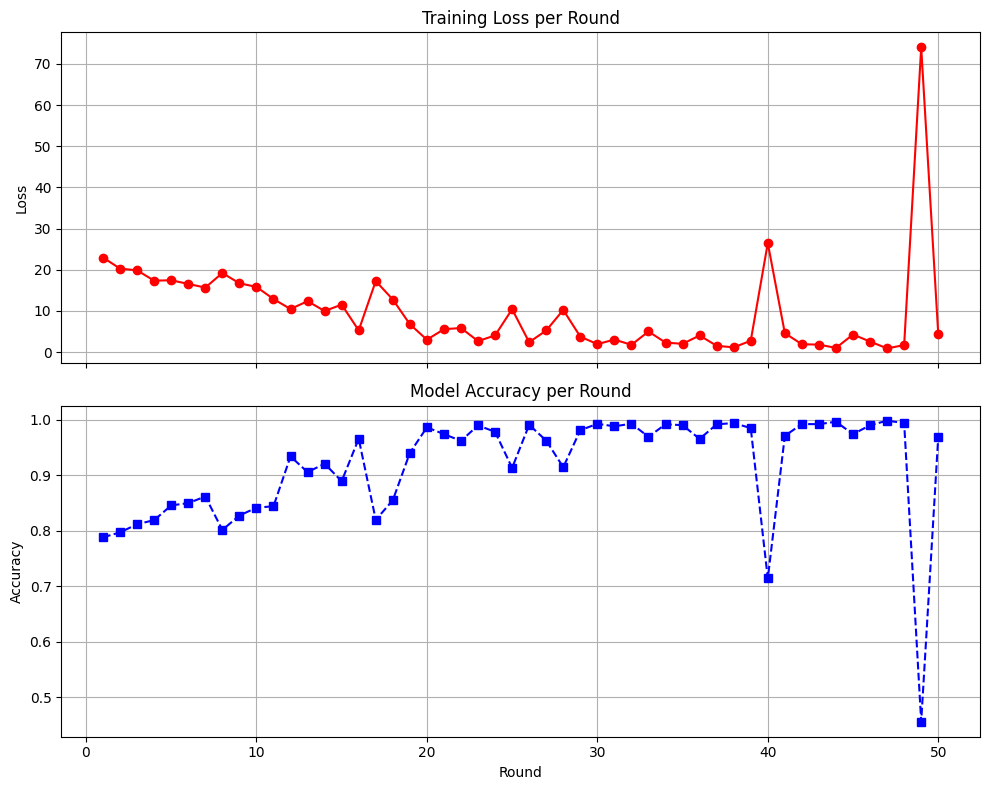

In [1]:
import matplotlib.pyplot as plt

# Data extracted from your logs
rounds = list(range(1, 51))

loss = [
    22.96071689431289, 20.281733714622696, 19.85253270249778, 17.341455355509535,
    17.45219366360903, 16.558737005502632, 15.66658326111354, 19.211383506913105,
    16.713728917186764, 15.83704076089, 12.88898235737727, 10.459956263087209,
    12.37115224757595, 9.974463739178502, 11.527272682195411, 5.27529655089854,
    17.25550429571371, 12.771688746239148, 6.779311185473927, 3.0025515488412897,
    5.550338895436831, 5.851583318165867, 2.6649069398485876, 4.049017113037974,
    10.414324605658338, 2.396051124081816, 5.243506752307635, 10.234463407809658,
    3.7499798397084203, 1.9298556574626842, 3.041409560855071, 1.7563145412553023,
    4.999163166818427, 2.308267157345699, 2.0011159113003627, 4.03249455315072,
    1.5268707358078093, 1.1418221410481126, 2.7497129345899074, 26.486478550437607,
    4.595516100495403, 1.8977207905199045, 1.8149062155472926, 1.0089840675234318,
    4.262533427839891, 2.558670841157077, 0.8976930964174971, 1.697050736555727,
    74.02772474624496, 4.415328937957801
]

accuracy = [
    0.7881545461556259, 0.79702321277088, 0.811752911236215, 0.8190792010488163,
    0.8456852008945785, 0.8497724994216087, 0.8617259196421686, 0.8014189866584407,
    0.8274080357831418, 0.8415207835274158, 0.8441428240919256, 0.9339862728464564,
    0.9056836585177759, 0.9207989511837742, 0.8893344644096552, 0.9659905915015038,
    0.8196190329297447, 0.8549394617104958, 0.9403100177373332, 0.9864270841366546,
    0.9742423073956967, 0.962057530654739, 0.9899745507827562, 0.9783296059227269,
    0.913241304850775, 0.9909770957044806, 0.9625202436955348, 0.9144752062928974,
    0.9811830030076347, 0.992827947867664, 0.9882779362988381, 0.9929821855479294,
    0.9694609393074728, 0.9919025217860723, 0.9903601449834194, 0.9656049973008406,
    0.9918254029459397, 0.9942160869900517, 0.985038945014267, 0.713966221948022,
    0.9710804349502583, 0.9923652348268682, 0.9921338783064703, 0.996529652194031,
    0.9741651885555641, 0.9902059073031542, 0.9984576231973471, 0.9942160869900517,
    0.4556852008945785, 0.9689211074265444
]

# Create a figure with two subplots, stacked vertically
# sharex=True makes them share the same x-axis (rounds)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)



## Plot 1: Training Loss
ax1.plot(rounds, loss, marker='o', linestyle='-', color='r')
ax1.set_title('Training Loss per Round')
ax1.set_ylabel('Loss')
ax1.grid(True)

## Plot 2: Model Accuracy
ax2.plot(rounds, accuracy, marker='s', linestyle='--', color='b')
ax2.set_title('Model Accuracy per Round')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Round')
ax2.grid(True)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

🧠 Using device: cuda
🎉 Model loaded from: /home/DSE423/Documents/FL Project/fedaverage_10client.pth
Combining validation data from all 10 clients...
Total validation images found: 12967
Running predictions on combined validation set...


Evaluating: 100%|██████████| 406/406 [00:16<00:00, 24.14it/s]


Generating confusion matrix...
✅ Confusion matrix saved as 'confusion_matrix_10client.png'
Removed temporary file: combined_validation_data.csv


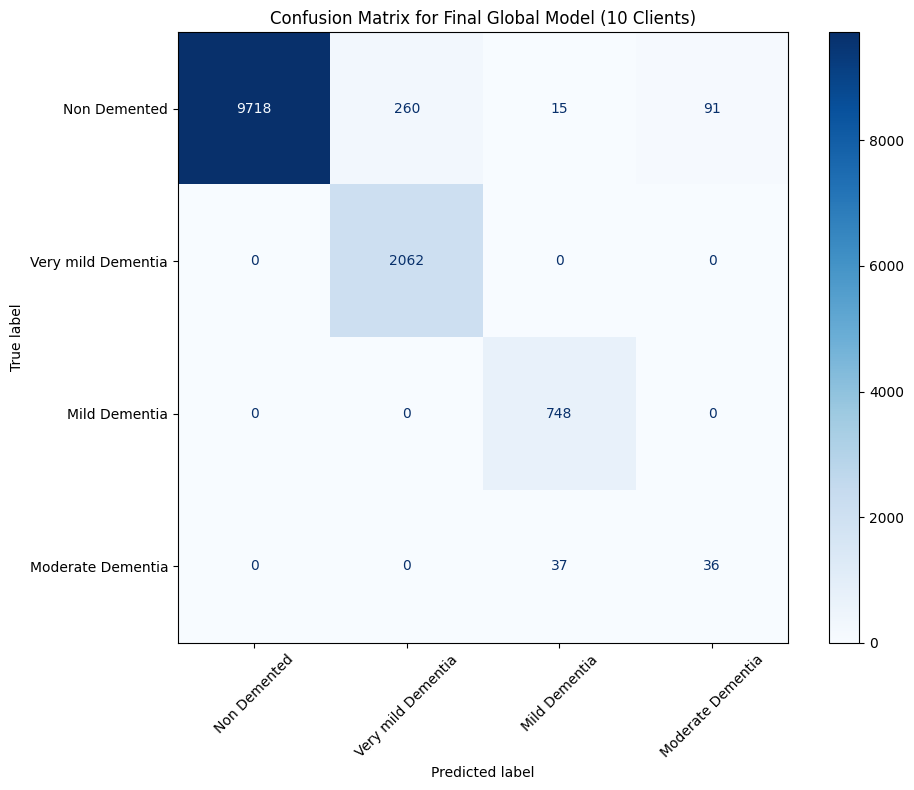

In [2]:
import torch
import torch.nn as nn
import pandas as pd
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os
import numpy as np
from tqdm import tqdm

# ===== Device setup (GPU or CPU) =====
# Use the same device you trained on
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🧠 Using device: {device}")

# ===== CNN Model (Must match the saved model's architecture) =====
class MRI_CNN(nn.Module):
    def __init__(self, num_classes=4):
        super(MRI_CNN, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.MaxPool2d(2),
        )
        self.block4 = nn.Sequential(
            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(0.4),
        )
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

# ===== Dataset Class (Must match the one used for training) =====
class MRIDataset(torch.utils.data.Dataset):
    def __init__(self, csv_path, transform=None):
        self.data = pd.read_csv(csv_path)
        self.transform = transform
        self.label_map = {
            "Non Demented": 0,
            "Very mild Dementia": 1,
            "Mild Dementia": 2,
            "Moderate Dementia": 3,
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 0]
        label_str = self.data.iloc[idx, 1]
        
        try:
            image = Image.open(img_path).convert("RGB")
        except FileNotFoundError:
            print(f"Warning: Image not found at {img_path}. Skipping.")
            return None, None # Handle missing images gracefully
        
        if self.transform:
            image = self.transform(image)
        
        label_int = self.label_map[label_str]
        return image, label_int

# ===== Transform (Must match the one used for training) =====
transform = transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3),
    ]
)

# --- 1. Load the Trained Model ---
# CHANGED: Updated model path to your 10-client model
model_path = "/home/DSE423/Documents/FL Project/fedaverage_10client.pth"
model = MRI_CNN(num_classes=4).to(device)
try:
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval() # Set model to evaluation mode (e.g., disable dropout)
    print(f"🎉 Model loaded from: {model_path}")
except FileNotFoundError:
    print(f"Error: Model file not found at {model_path}")
    print("Please check the path and try again.")
    # Stop execution if model not found
    raise
except Exception as e:
    print(f"Error loading model: {e}")
    print("Ensure the model architecture in this script matches the saved model.")
    raise

# --- 2. Combine All Client Validation Data ---
base_path = "/home/DSE423/Documents/FL Project/client_splits/splits/" 
num_clients = 10
all_val_dfs = []

print(f"Combining validation data from all {num_clients} clients...")
for i in range(1, num_clients + 1):
    val_csv = f"{base_path}client_{i}_val.csv" 
    if os.path.exists(val_csv):
        df = pd.read_csv(val_csv)
        all_val_dfs.append(df)
    else:
        print(f"Warning: Could not find {val_csv}")

# Check if any data was loaded
if not all_val_dfs:
    print("Error: No validation CSV files were found. Please check the base_path.")
else:
    combined_val_df = pd.concat(all_val_dfs, ignore_index=True)
    
    # Save to a temporary CSV file for the Dataset class
    temp_csv_path = "combined_validation_data.csv"
    combined_val_df.to_csv(temp_csv_path, index=False)
    
    print(f"Total validation images found: {len(combined_val_df)}")

    # --- 3. Create Combined Validation Loader ---
    val_dataset = MRIDataset(csv_path=temp_csv_path, transform=transform)
    
    # Custom collate function to filter out None (missing images)
    def collate_fn(batch):
        batch = list(filter(lambda x: x[0] is not None, batch))
        return torch.utils.data.dataloader.default_collate(batch)

    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)

    # --- 4. Run Predictions ---
    y_true = []
    y_pred = []

    print("Running predictions on combined validation set...")
    with torch.no_grad(): # Disable gradient calculations
        for imgs, labels in tqdm(val_loader, desc="Evaluating"):
            imgs, labels = imgs.to(device), labels.to(device)
            
            outputs = model(imgs)
            # Get the index of the max log-probability (the predicted class)
            preds = outputs.argmax(dim=1)
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    # --- 5. Compute and Plot Confusion Matrix ---
    if not y_true:
        print("Error: No valid data was processed. Cannot generate confusion matrix.")
    else:
        class_names = ["Non Demented", "Very mild Dementia", "Mild Dementia", "Moderate Dementia"]
        
        # Ensure labels are integers
        y_true_int = np.array(y_true).astype(int)
        y_pred_int = np.array(y_pred).astype(int)

        # Filter out any potential labels that are not in the expected range (0-3)
        valid_indices = [i for i, label in enumerate(y_true_int) if label in range(4)]
        y_true_filtered = y_true_int[valid_indices]
        y_pred_filtered = y_pred_int[valid_indices]

        print("Generating confusion matrix...")
        cm = confusion_matrix(y_true_filtered, y_pred_filtered, labels=[0, 1, 2, 3])
        
        fig, ax = plt.subplots(figsize=(10, 8))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=45)
        
        plt.title("Confusion Matrix for Final Global Model (10 Clients)")
        plt.tight_layout()
        plt.savefig('confusion_matrix_10client.png')

        print("✅ Confusion matrix saved as 'confusion_matrix_10client.png'")
        
    # --- 6. Clean up temporary file ---
    os.remove(temp_csv_path)
    print(f"Removed temporary file: {temp_csv_path}")

In [1]:
import pandas as pd
import os

# --- Configuration ---
base_path = "/home/DSE423/Documents/FL Project/client_splits/splits/"
num_clients = 10
# Assumes the file path is the first column, as in your Dataset
path_column_index = 0 

# --- Create master sets ---
all_train_paths = set()
all_val_paths = set()

print("Scanning for data leakage...")

for i in range(1, num_clients + 1):
    train_csv_path = os.path.join(base_path, f"client_{i}_train.csv")
    val_csv_path = os.path.join(base_path, f"client_{i}_val.csv")
    
    # 1. Load training paths for this client
    if os.path.exists(train_csv_path):
        try:
            df_train = pd.read_csv(train_csv_path)
            # Add all paths from the first column to the master training set
            all_train_paths.update(df_train.iloc[:, path_column_index])
        except Exception as e:
            print(f"Error reading {train_csv_path}: {e}")
    else:
        print(f"Warning: Training file not found: {train_csv_path}")

    # 2. Load validation paths for this client
    if os.path.exists(val_csv_path):
        try:
            df_val = pd.read_csv(val_csv_path)
            # Add all paths from the first column to the master validation set
            all_val_paths.update(df_val.iloc[:, path_column_index])
        except Exception as e:
            print(f"Error reading {val_csv_path}: {e}")
    else:
        print(f"Warning: Validation file not found: {val_csv_path}")

print("---" * 10)
print(f"Total unique training images found: {len(all_train_paths)}")
print(f"Total unique validation images found: {len(all_val_paths)}")

# --- 3. Find the intersection (the leak) ---
leaked_paths = all_train_paths.intersection(all_val_paths)

print("---" * 10)

# --- 4. Report the results ---
if len(leaked_paths) > 0:
    print(f"❌ ERROR: Data leakage found! {len(leaked_paths)} images are in BOTH training and validation sets.")
    print("Here are the first 10 leaked paths:")
    for path in list(leaked_paths)[:10]:
        print(path)
else:
    print("✅ SUCCESS: No data leakage found!")
    print("Your training and validation sets are unique.")
    
print("---" * 10)

Scanning for data leakage...
------------------------------
Total unique training images found: 60500
Total unique validation images found: 12967
------------------------------
✅ SUCCESS: No data leakage found!
Your training and validation sets are unique.
------------------------------
